In [5]:
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_test = pd.read_pickle('/home/nedderlander/datascience/burn notice/Data-Science/Data/X_test_full.pkl')
y_test = pd.read_pickle('/home/nedderlander/datascience/burn notice/Data-Science/Data/y_test_full.pkl')

In [1]:
# now to reload and examine
from sklearn.externals import joblib

rfc = joblib.load('datascience/burn notice/Data-Science/Models/rfc_training_results.pkl')
rfc_results = joblib.load('rfc_training_results.pkl')

# knn = joblib.load('knn_trained_full.pkl')
# knn_results = joblib.load('knn_training_results.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'rfc_trained_full.pkl'

In [7]:
# knn results
knn_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__weights,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__leaf_size,param_kneighborsclassifier__algorithm,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.290352,3.968715,114.839129,49.650512,distance,20,75,kd_tree,"{'kneighborsclassifier__weights': 'distance', ...",0.413199,...,0.447639,0.048656,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
1,5.703474,4.474398,986.181201,309.906147,distance,20,75,ball_tree,"{'kneighborsclassifier__weights': 'distance', ...",0.413199,...,0.447639,0.048656,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
8,5.225427,4.090277,89.449686,35.354136,distance,20,30,kd_tree,"{'kneighborsclassifier__weights': 'distance', ...",0.413199,...,0.447639,0.048656,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
9,5.217969,3.995042,59.329236,19.883145,distance,5,30,kd_tree,"{'kneighborsclassifier__weights': 'distance', ...",0.397460,...,0.427559,0.043727,4,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
5,4.827320,3.684388,83.962747,28.137784,uniform,10,45,kd_tree,"{'kneighborsclassifier__weights': 'uniform', '...",0.399202,...,0.422663,0.048888,5,0.839419,0.807068,0.813333,0.804946,0.79688,0.812329,0.014531


In [8]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred = knn.predict(X_test)
print('ROC: ', roc_auc_score(y_test, y_pred_proba))
print('f1: ', roc_auc_score(y_test, y_pred))


ROC:  0.7159239384235421
f1:  0.652666587936751


In [9]:
y_pred_proba = rfc.predict_proba(X_test)[:,1]
y_pred = rfc.predict(X_test)
print('ROC: ', roc_auc_score(y_test, y_pred_proba))
print('f1: ', roc_auc_score(y_test, y_pred))


ROC:  0.7318510373577879
f1:  0.6458607919762843


In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def normalized_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred) 
    #normalize cm
    array = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(array, range(2),
                      range(2))
    #plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})#.set_title('Normalized confusion matrix')# font size
    ax.set(xlabel='Predicted Fires', ylabel='True Fires', title = title)
    plt.show();

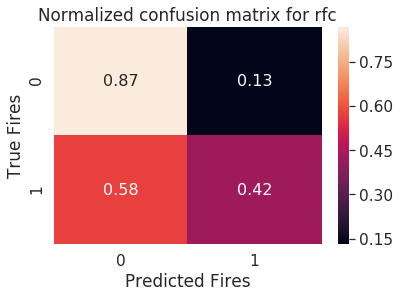

In [13]:
normalized_confusion_matrix(y_test, y_pred, 'Normalized confusion matrix for rfc')

/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype uint8, uint16, float32 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


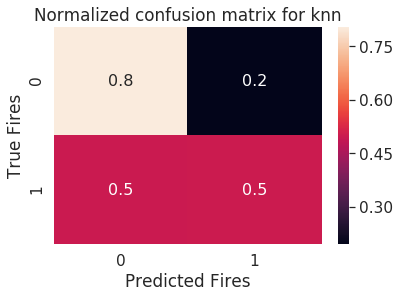

In [14]:
normalized_confusion_matrix(y_test, knn.predict(X_test), 'Normalized confusion matrix for knn')